## LAB REGRESSION
### Individual Notebook Aída García
Group: Aida García, Monica Basile, Laura Ballesteros

In [ ]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning Data

In [23]:
root = (r'C:\Users\aidag\OneDrive\Escritorio\ironhack\data_mid_bootcamp_project_regression\regression_data.xls')
df_original = pd.read_excel(root)
df_copy = df_original.copy()
df_copy.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [24]:
df_copy.set_index('id', inplace=True)
df_copy.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [25]:
df_copy.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [26]:
df_copy.shape

(21597, 20)

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat       

In [27]:
df_copy.describe()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,2014-10-29 04:20:38.171968512,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
min,2014-05-02 00:00:00,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2014-07-22 00:00:00,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,2014-10-16 00:00:00,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,2015-02-17 00:00:00,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,2015-05-27 00:00:00,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06
std,NaN,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05


In [28]:
duplicates = df_copy.duplicated()
duplicates

id
7129300520    False
6414100192    False
5631500400    False
2487200875    False
1954400510    False
              ...  
263000018     False
6600060120    False
1523300141    False
291310100     False
1523300157    False
Length: 21597, dtype: bool

In [29]:
df_copy['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [30]:
df_copy['floors'].value_counts()

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: count, dtype: int64

In [31]:
df_copy['bathrooms'] = df_copy['bathrooms'].astype(int)
df_copy['floors'] = df_copy['floors'].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  int32         
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  int32         
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat       

In [32]:
numerical_data = df_copy.select_dtypes('int64', 'float64')
categorical_data = df_copy.select_dtypes('object')
date_time = df_copy.select_dtypes('datetime64[ns]')

## EDA

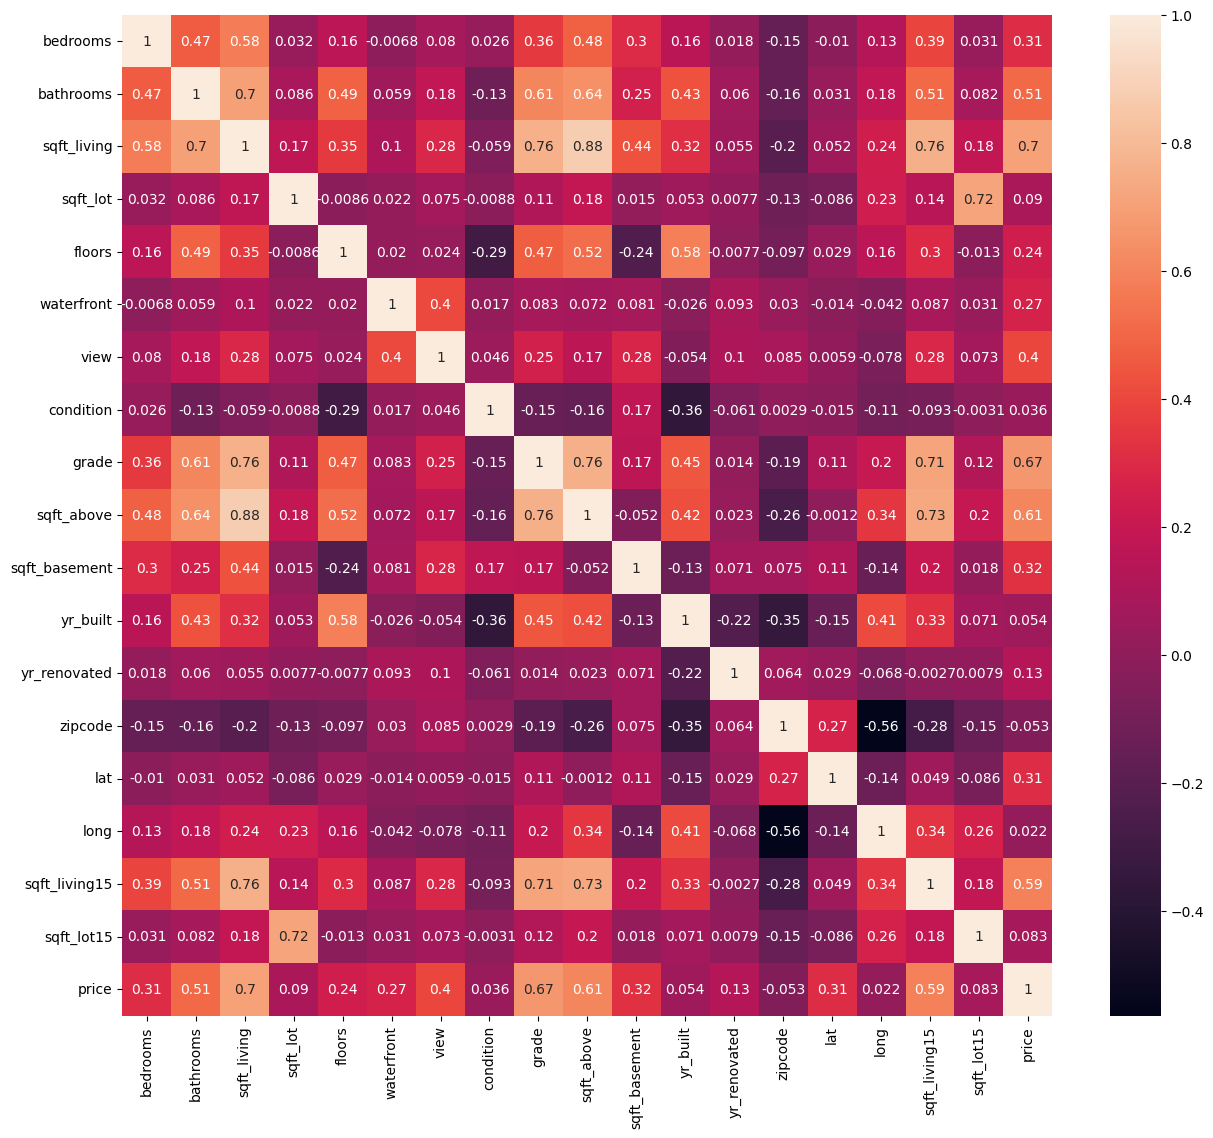

In [33]:
corr_matrix=df_copy.select_dtypes("number").corr(method='pearson')  
fig, ax = plt.subplots(figsize=(15, 13))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

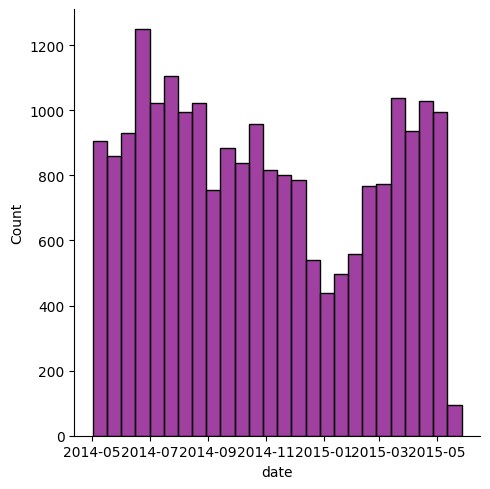

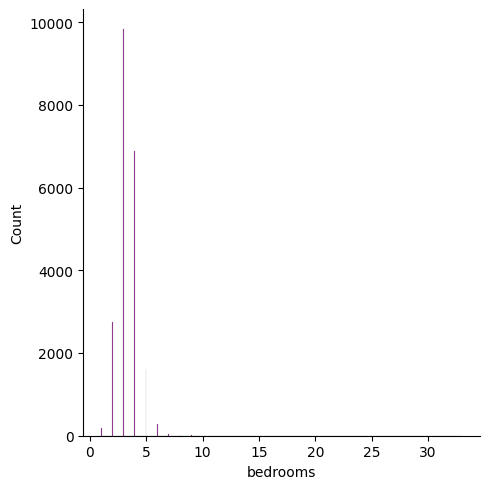

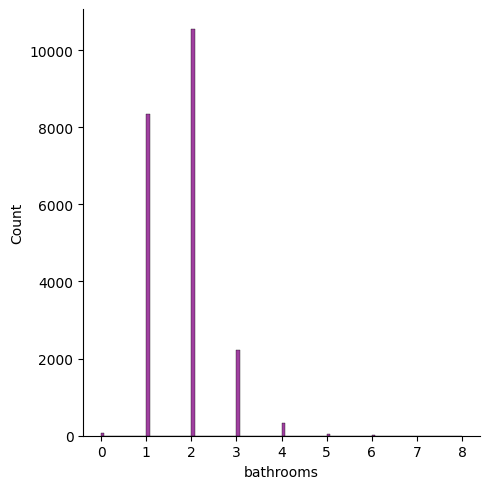

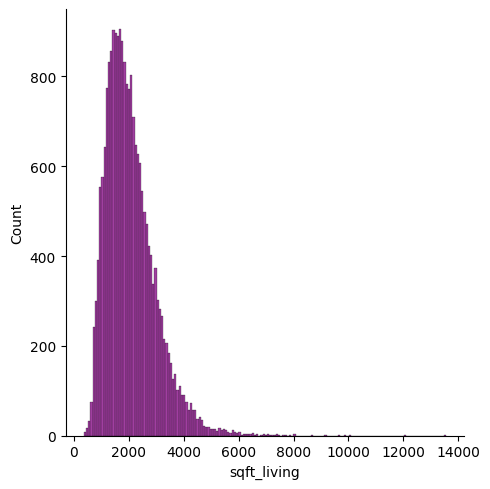

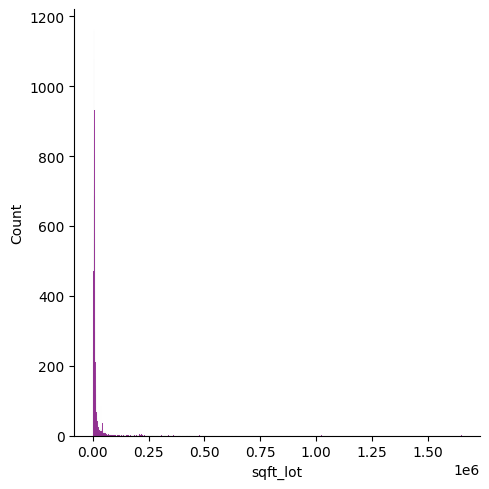

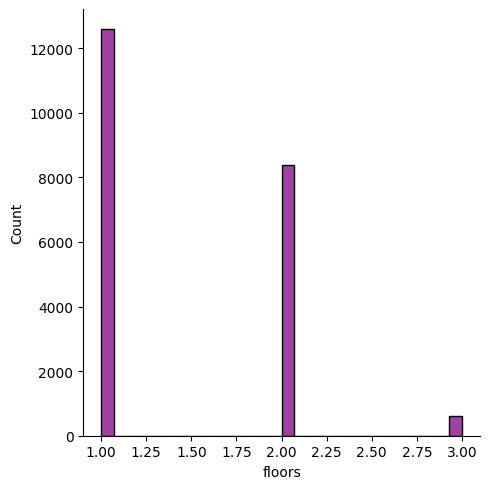

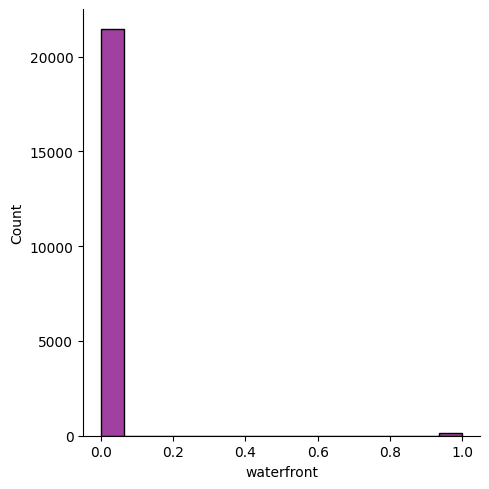

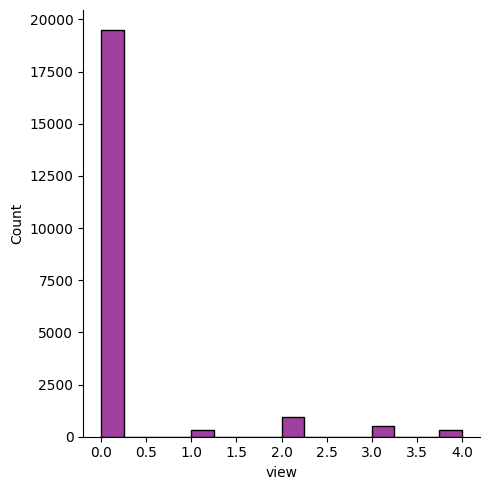

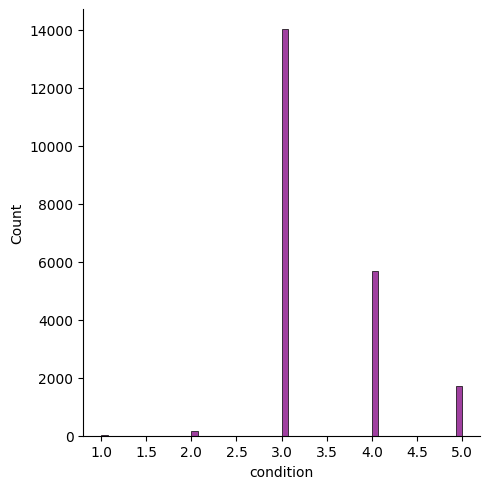

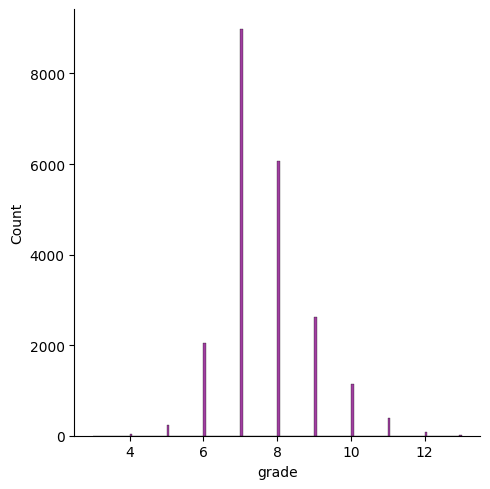

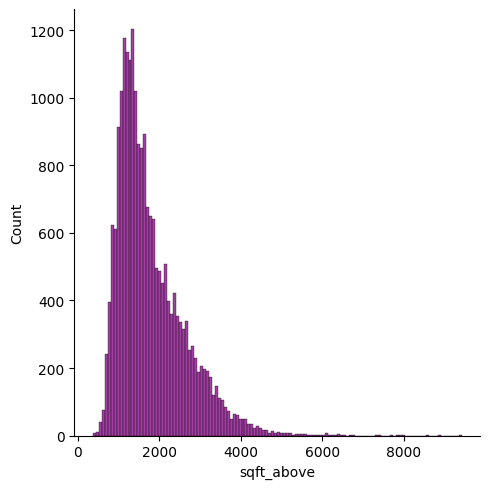

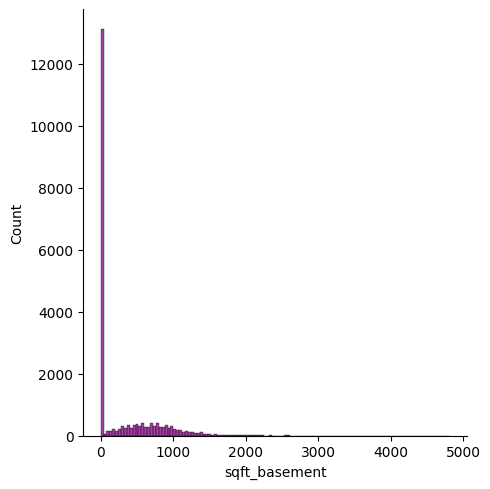

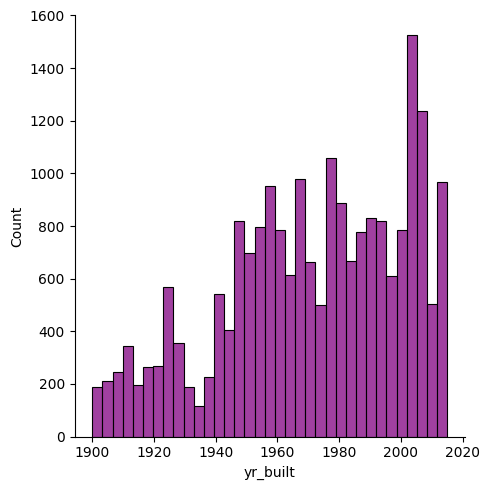

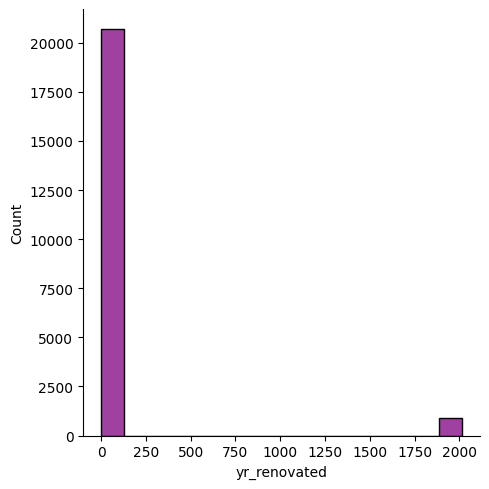

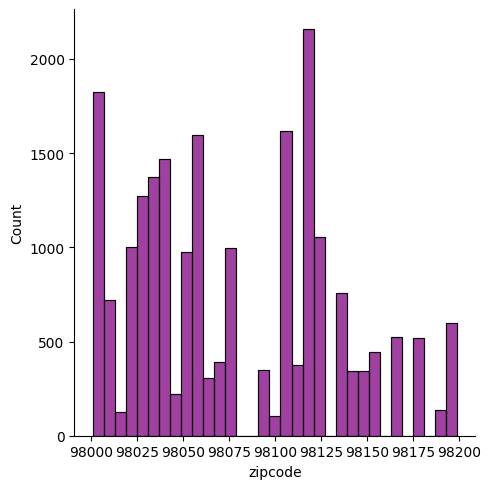

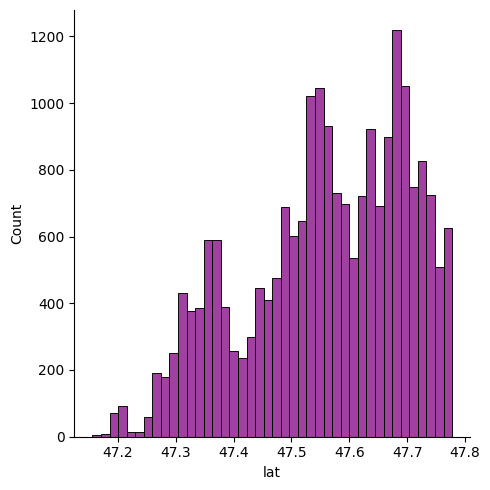

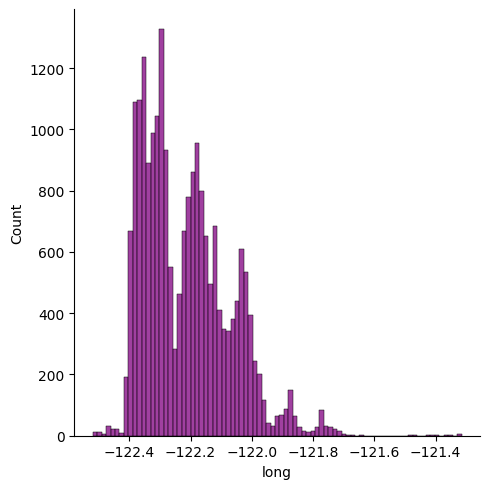

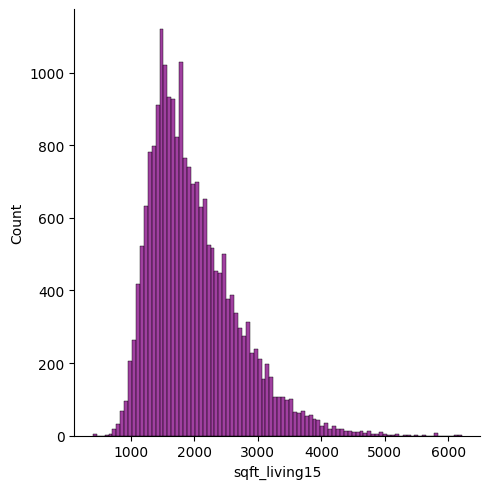

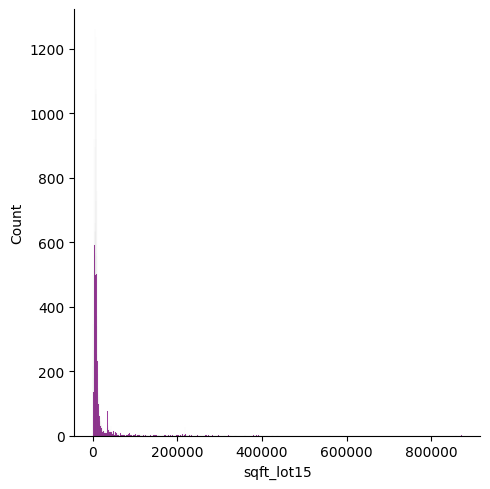

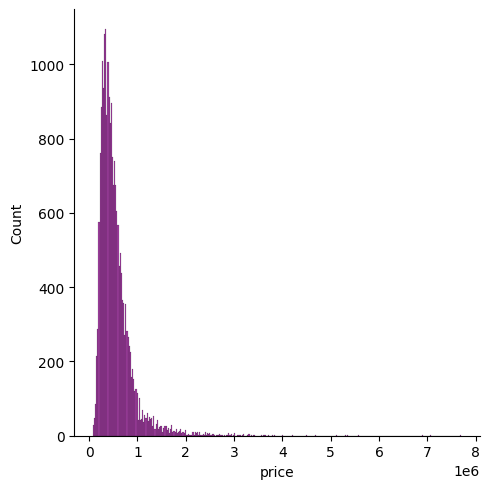

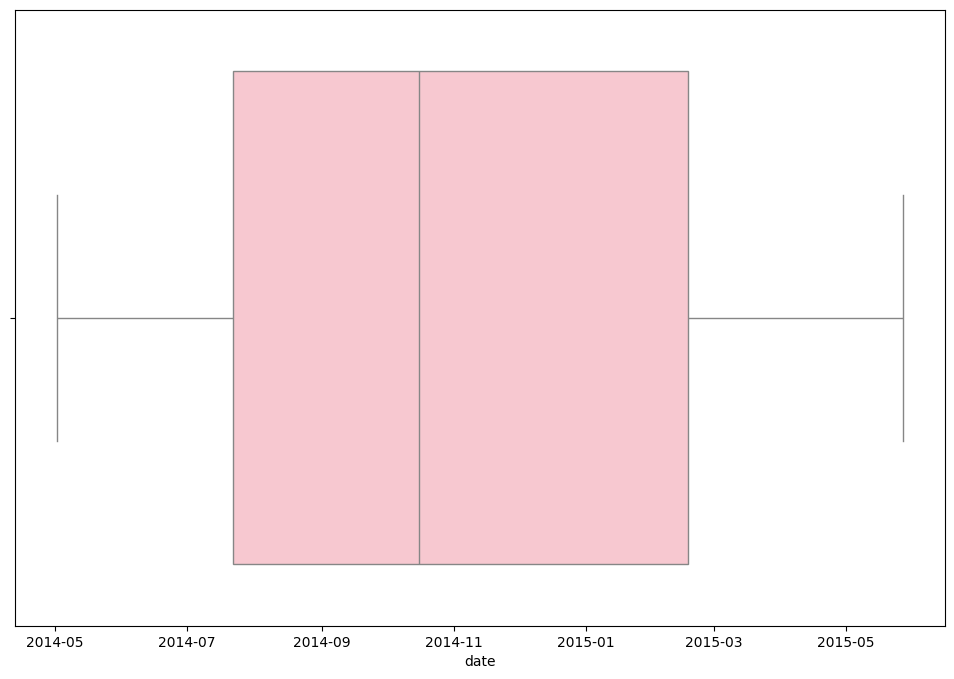

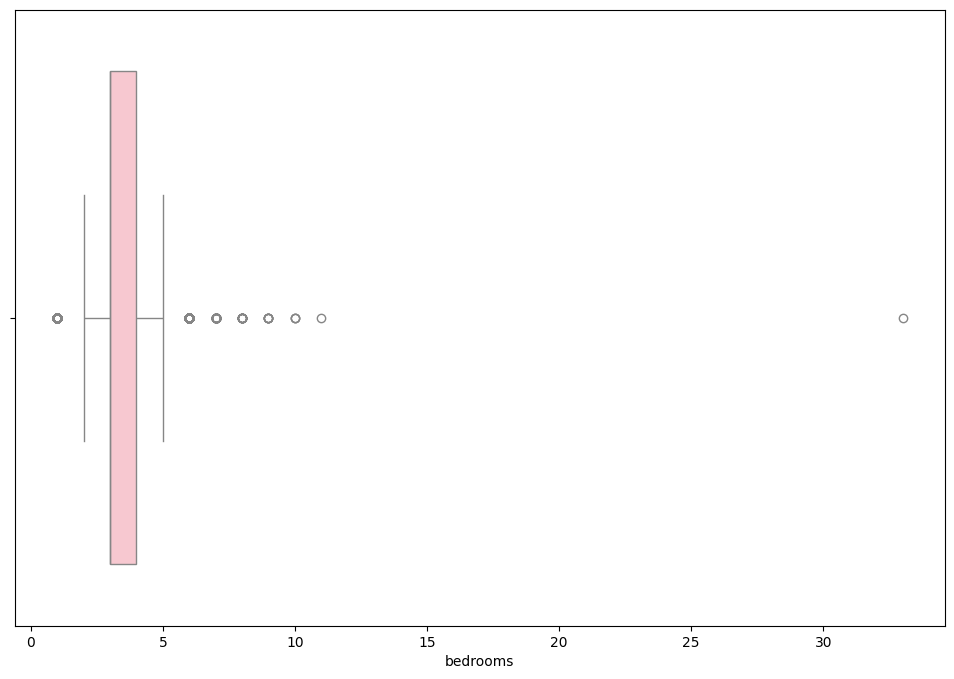

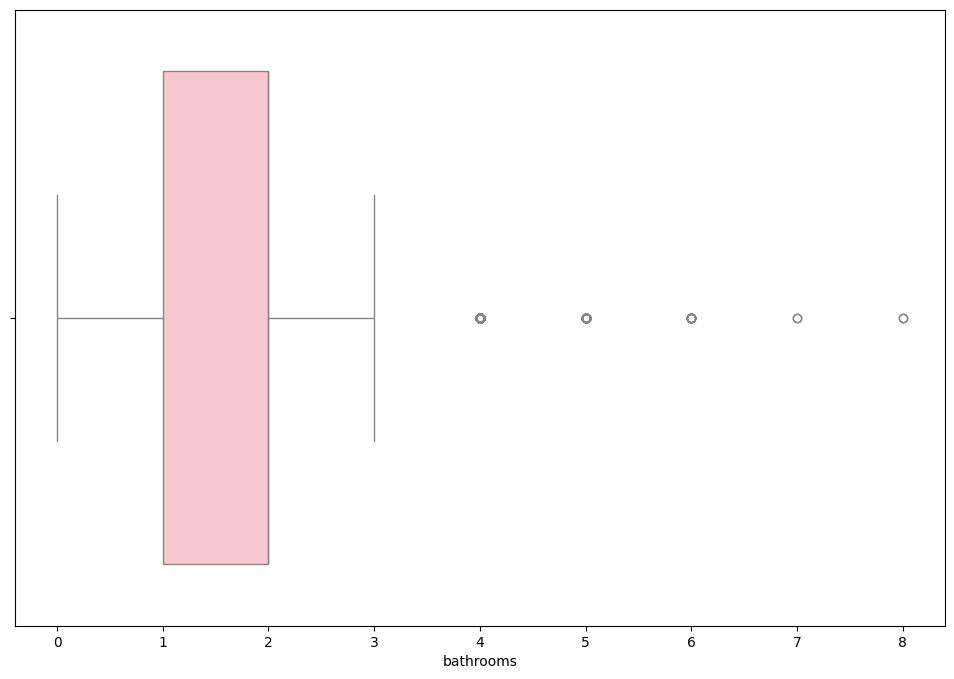

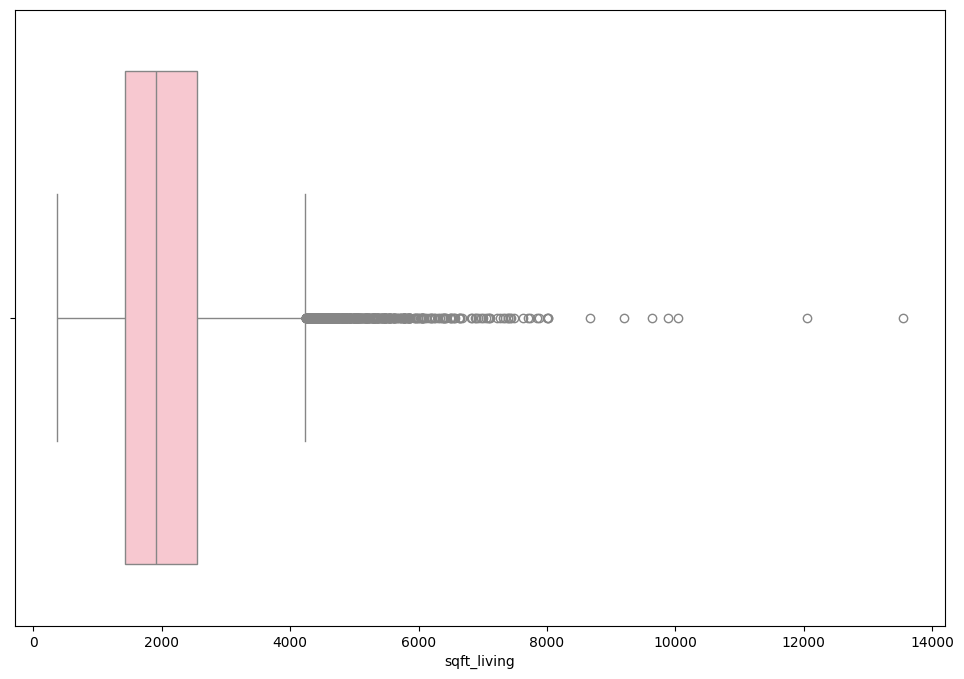

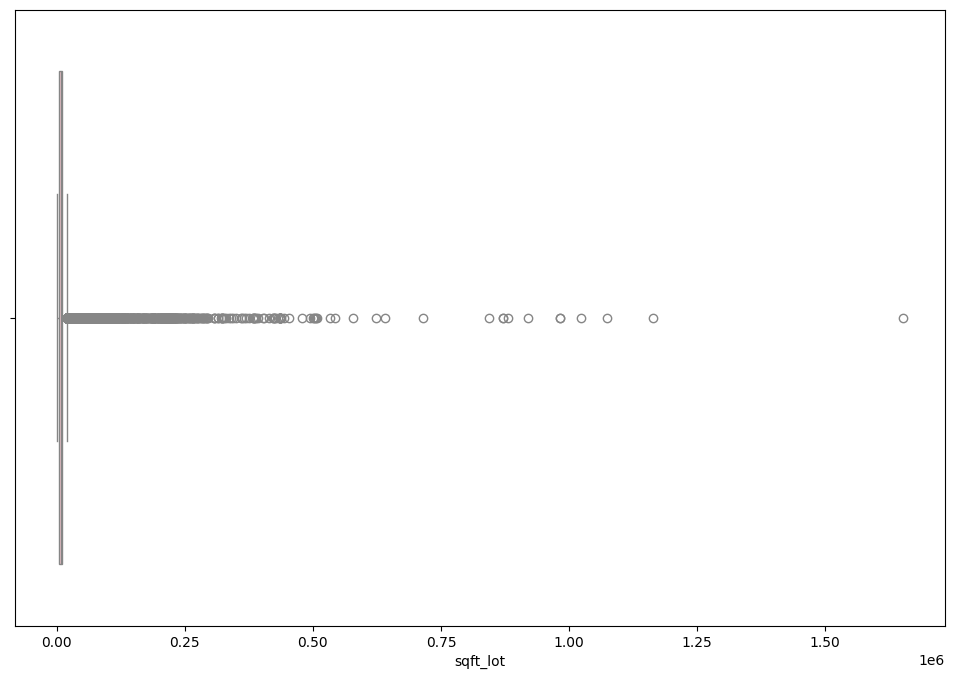

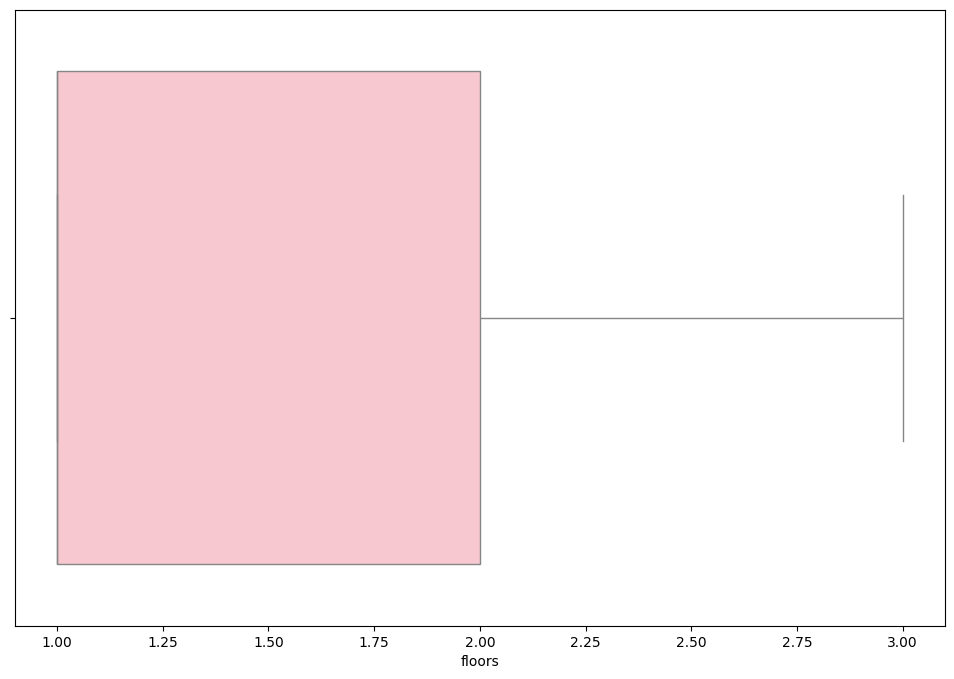

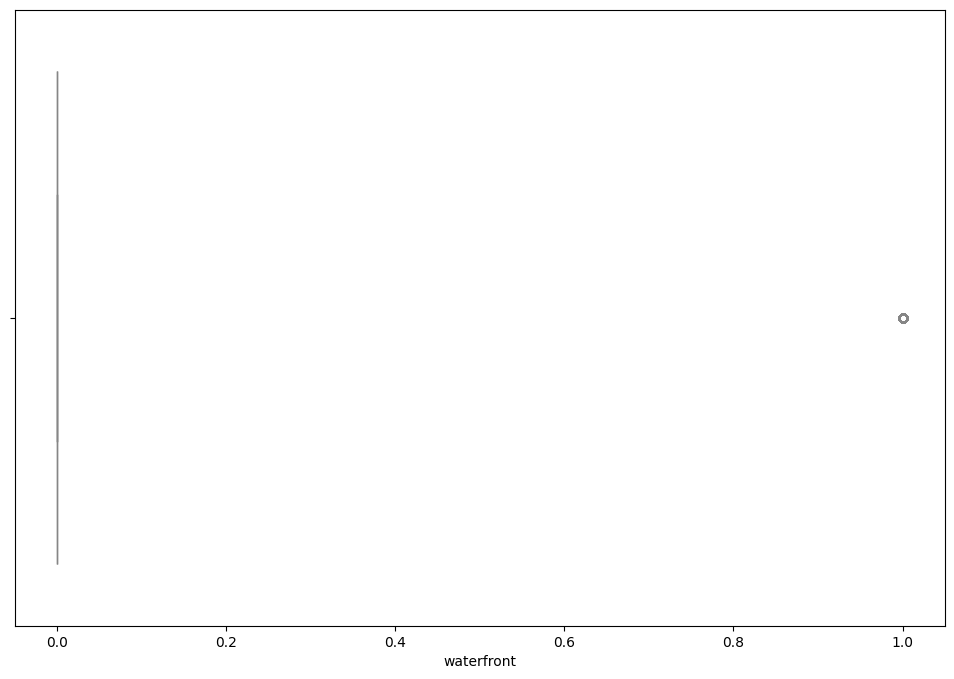

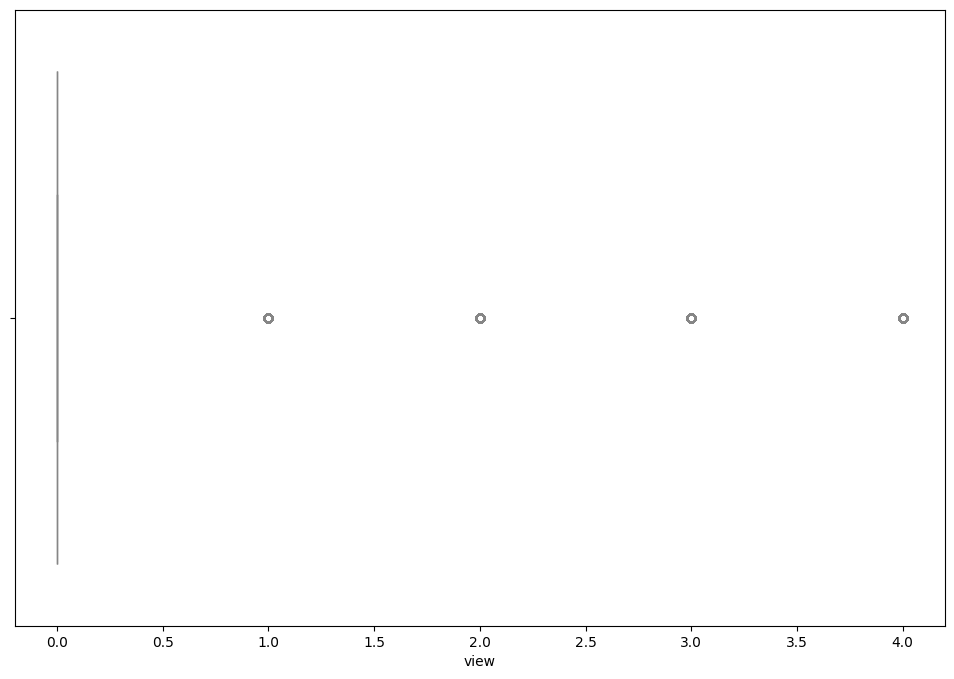

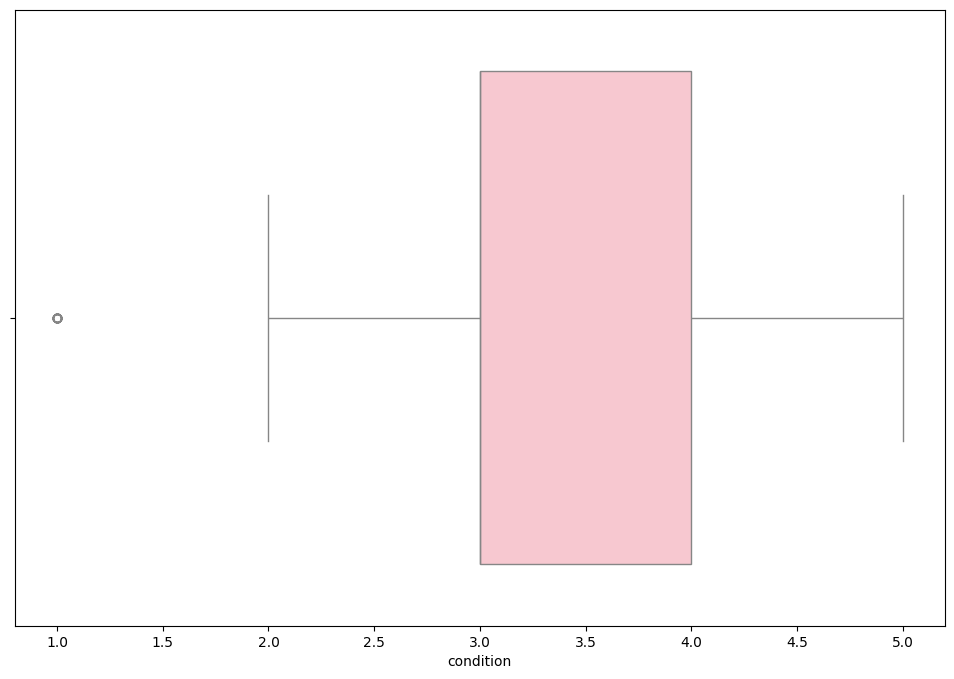

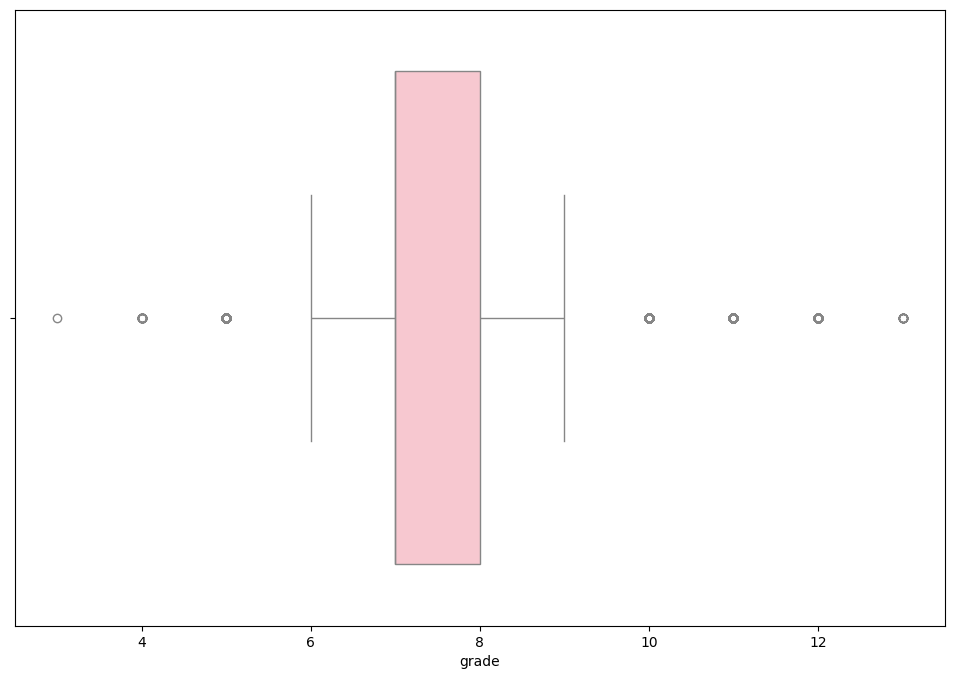

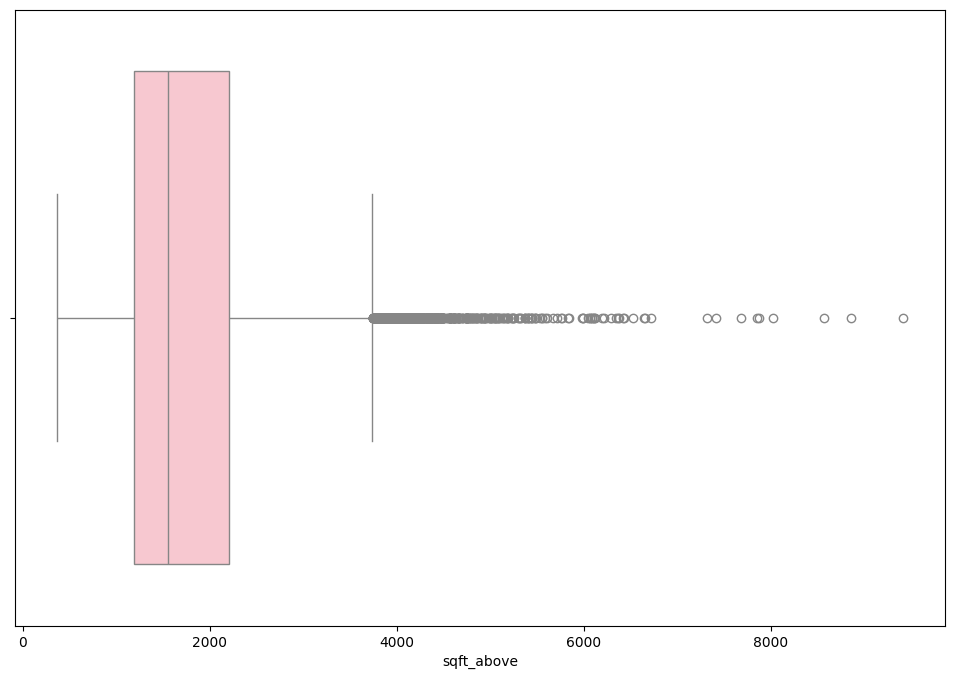

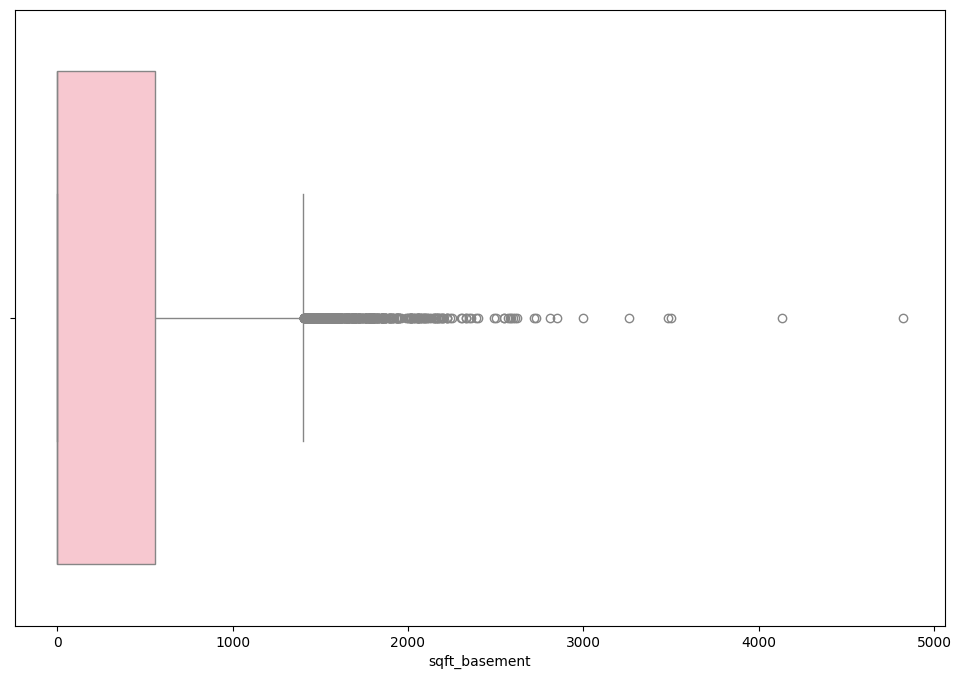

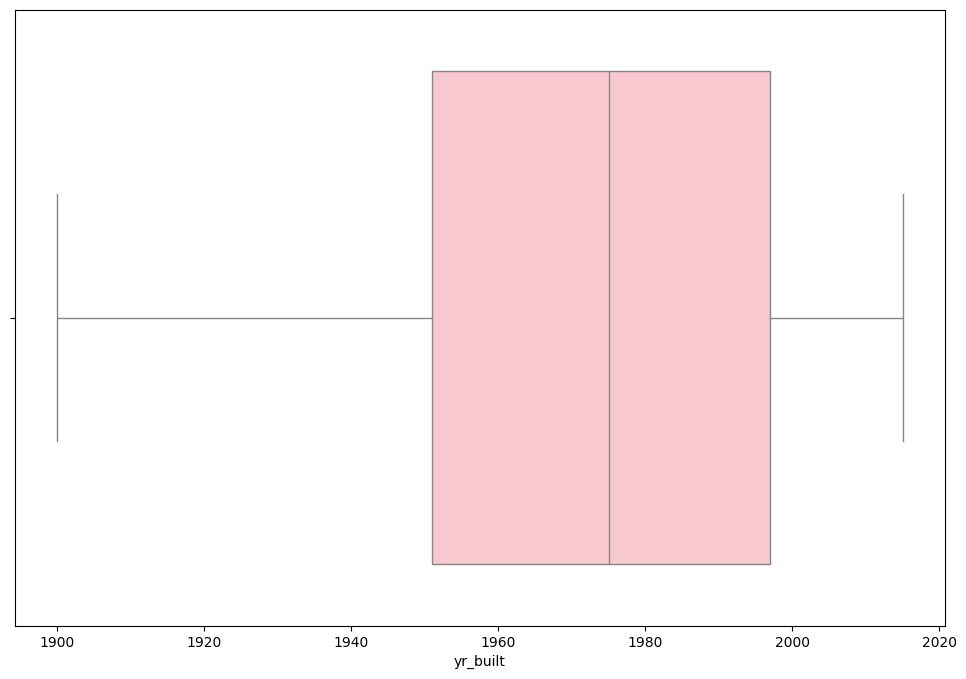

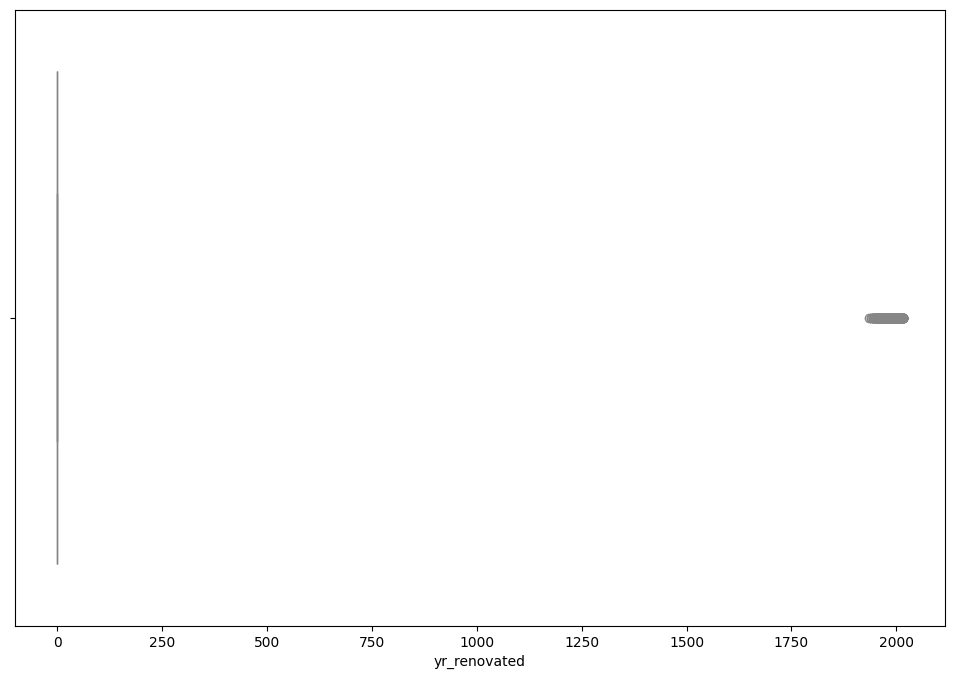

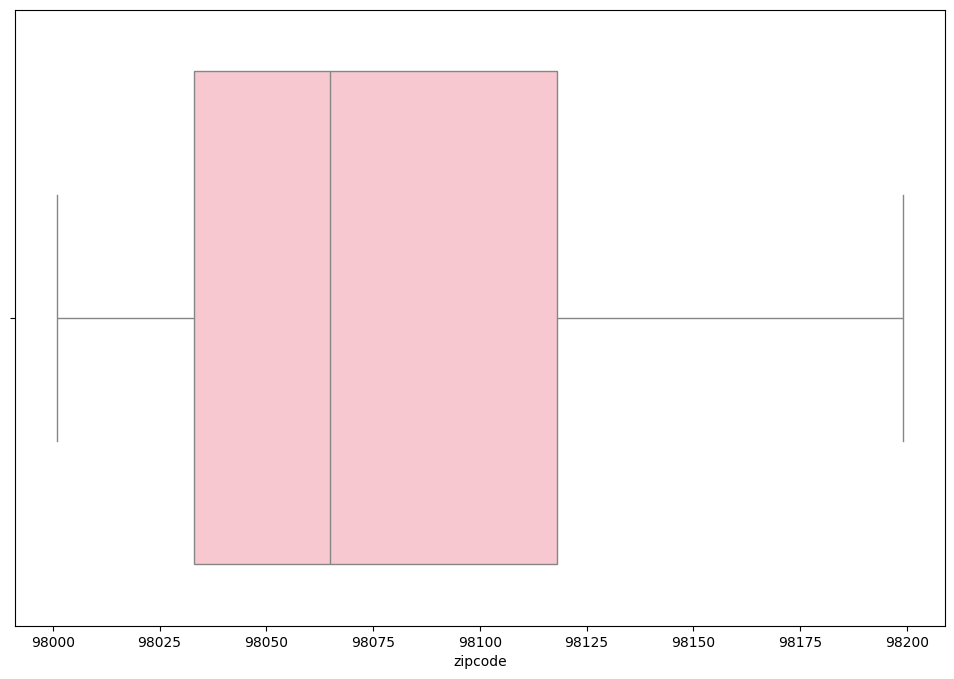

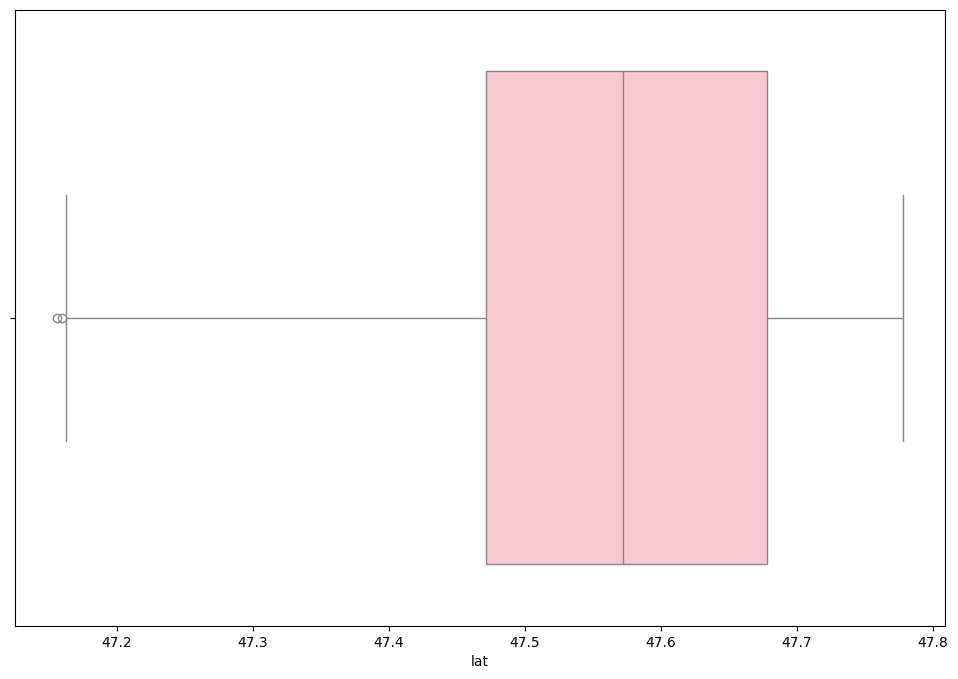

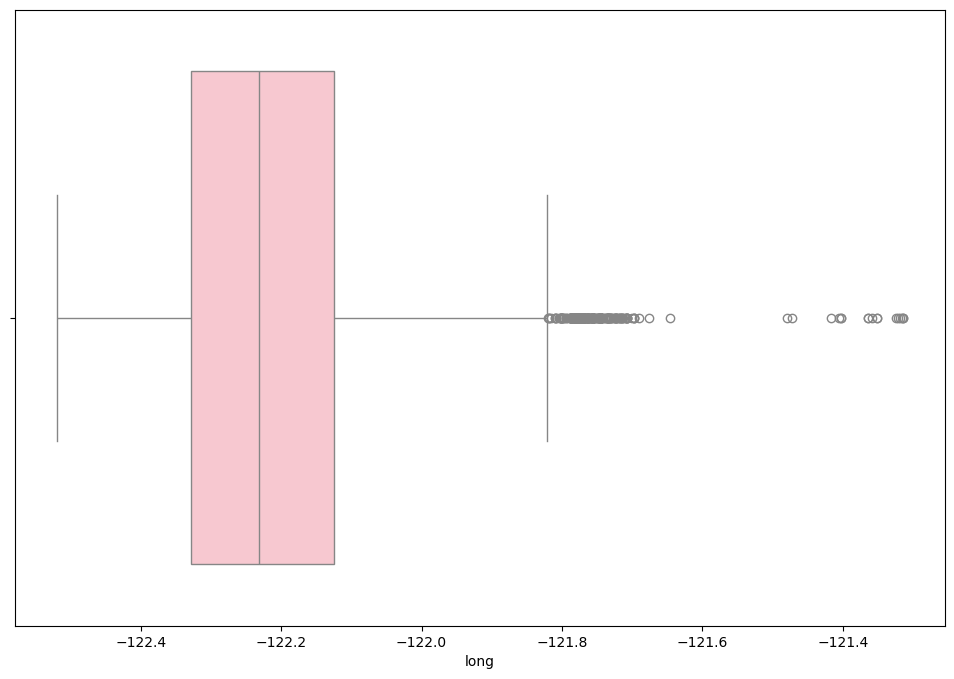

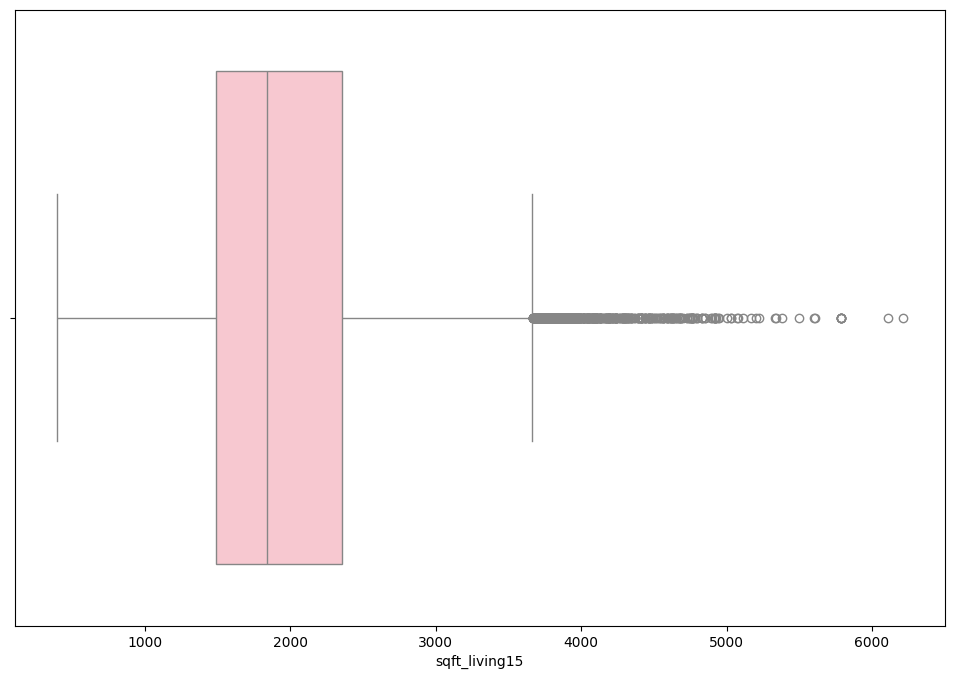

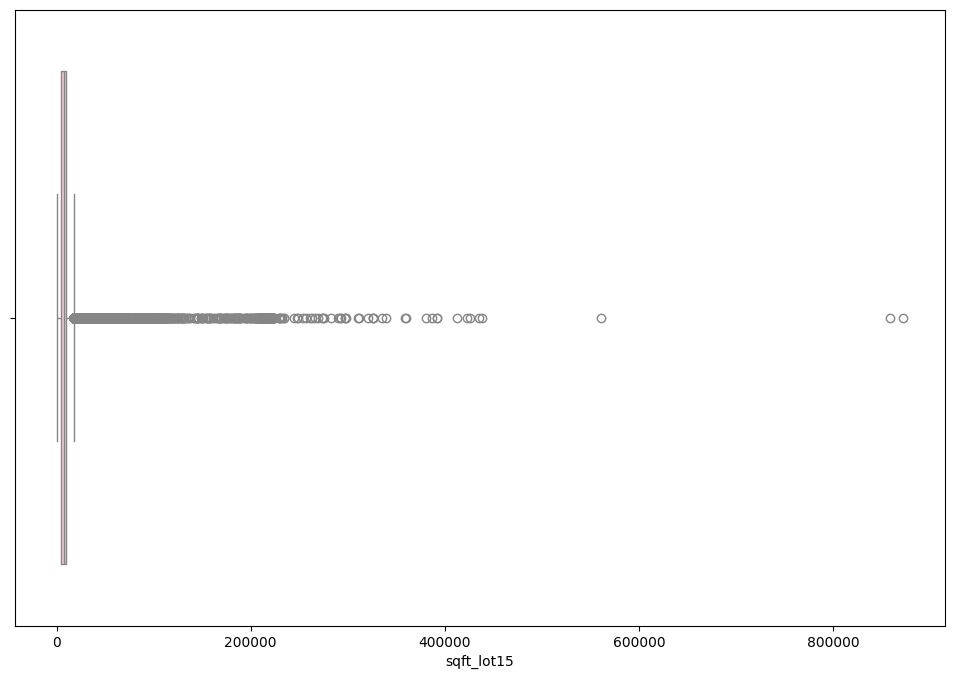

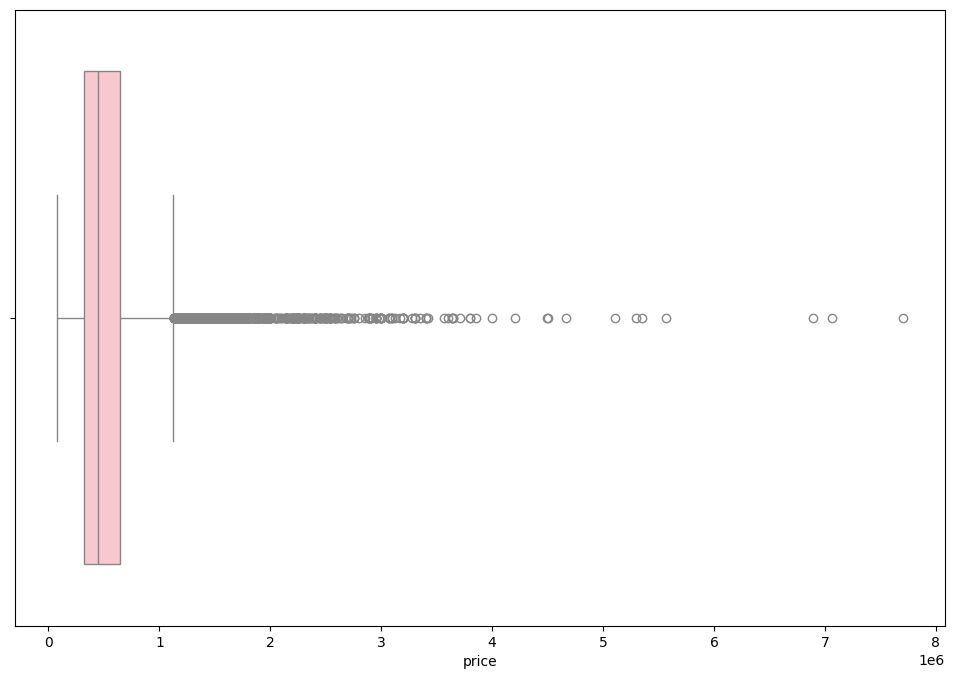

In [34]:
for i in df_copy:
    sns.displot(df_copy[i], color='purple')
    plt.show()

for column in df_copy:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=df_copy[column], color='pink')
    plt.show()

## Training model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [36]:
df_copy_filtered = df_copy[df_copy["bedrooms"] < 8]
df_copy_filtered = df_copy_filtered[df_copy_filtered["bathrooms"] <= 5]
df_copy_filtered = df_copy_filtered[df_copy_filtered["sqft_living"] <= 100000]
df_copy_filtered = df_copy_filtered[df_copy_filtered["sqft_above"] <= 8000]

In [40]:
X = pd.get_dummies(df_copy_filtered.drop(['price','date' ], axis=1))
y = df_copy_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.7108673452108579
MAE: 122244.0044828913
RMSE: 195439.9715622811


<Axes: xlabel='price'>

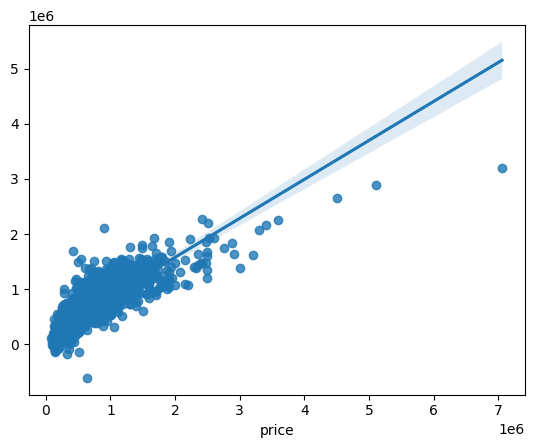

In [18]:
sns.regplot(x=y_test, y=model.predict(X_test))